# Bayes study

References:
- https://medium.com/loftbr/masp-nosso-framework-de-marketing-digital-3ec46bfc2f96

### Setup

In [1]:
# don't cache libs
%load_ext autoreload
%autoreload 2

In [2]:
# import required libs
import time
import numpy as np
import matplotlib.pyplot as plt
from bayes_study.conjugates import BetaBernoulliConjugate
from bayes_study.ab_test import ABTest

### Single distribution

10 0.6


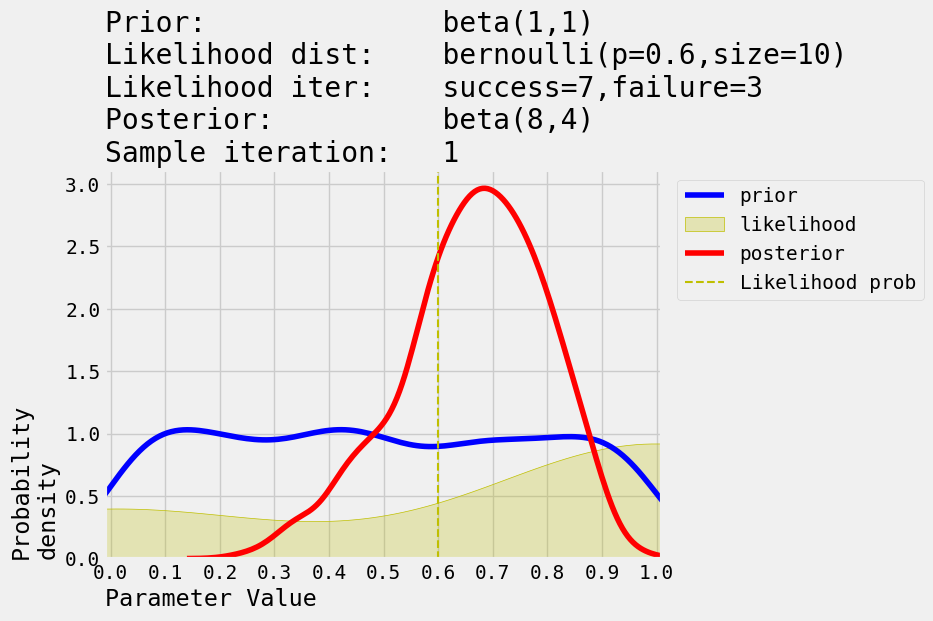

In [8]:
# likelihood dist
likelihood_dist = np.random.binomial(n=1, p=0.7, size=10).tolist()

# create a Beta-Bernoulli conjugate distributions object
bbc = BetaBernoulliConjugate(
    prior_alpha=1,
    prior_beta=1,
    likelihood_dist=likelihood_dist,
    # likelihood_prob = 0.7,
    # likelihood_trials = 10,    
    sampling_size=1_000,
)

# plot
print(len(likelihood_dist), np.mean(likelihood_dist))
fig, ax = plt.subplots()
bbc.plot_dists(ax=ax, fig=fig)

Prior: beta(1, 1)
Likelihood dist: bernoulli(p=0.75, size=10)
Likelihood iter: success=8, failure=2
Posterior: beta(9, 3)
Sample iteration: {'prior': 1, 'likelihood': 1, 'posterior': 1}


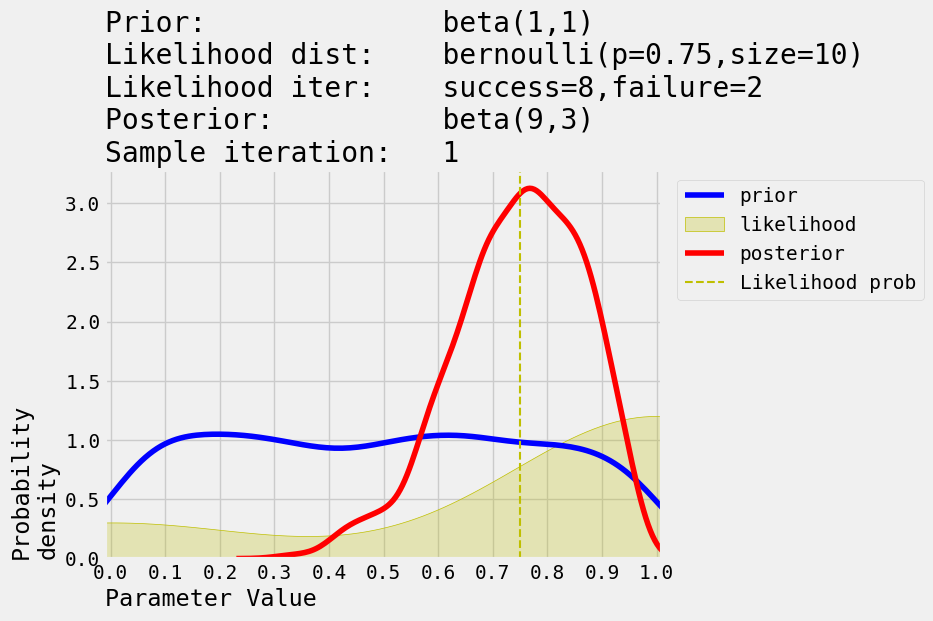

In [4]:
# create a Beta-Bernoulli conjugate distributions object
bbc = BetaBernoulliConjugate(
    prior_alpha=1,
    prior_beta=1,
    likelihood_prob=0.75,
    likelihood_trials=10,
    sampling_size=1_000  
)
# # update posterior from prior and likelihood
# bbc.update_distributions()
# display report
bbc.report_dists()

# plot
fig, ax = plt.subplots()
bbc.plot_dists(ax=ax, fig=fig)

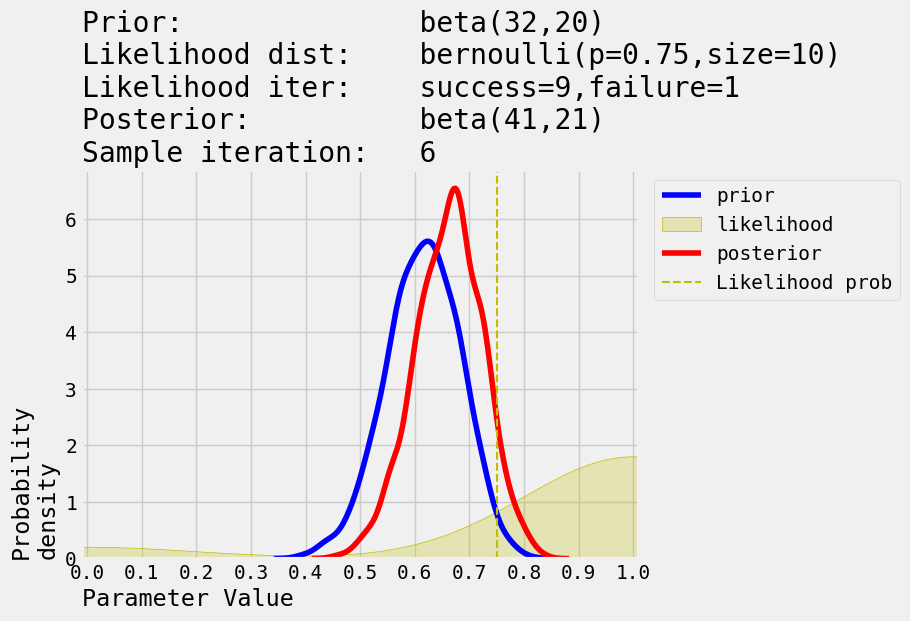

In [5]:
# create a Beta-Bernoulli conjugate distributions object
# the same one from previous cel
bbc = BetaBernoulliConjugate(
    prior_alpha=1,
    prior_beta=1,
    likelihood_prob=0.75,
    likelihood_trials=10,
    sampling_size=1_000  
)

# iterate 5 times
for _ in range(5):
    # update posterior from prior and likelihood
    bbc.update_distributions()

# plot
fig, ax = plt.subplots()
bbc.plot_dists(ax=ax, fig=fig)

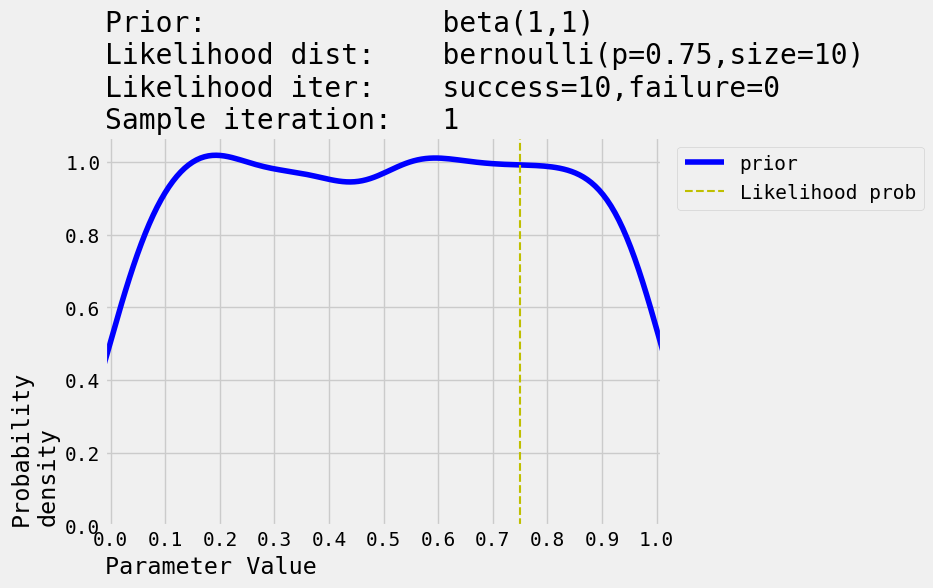

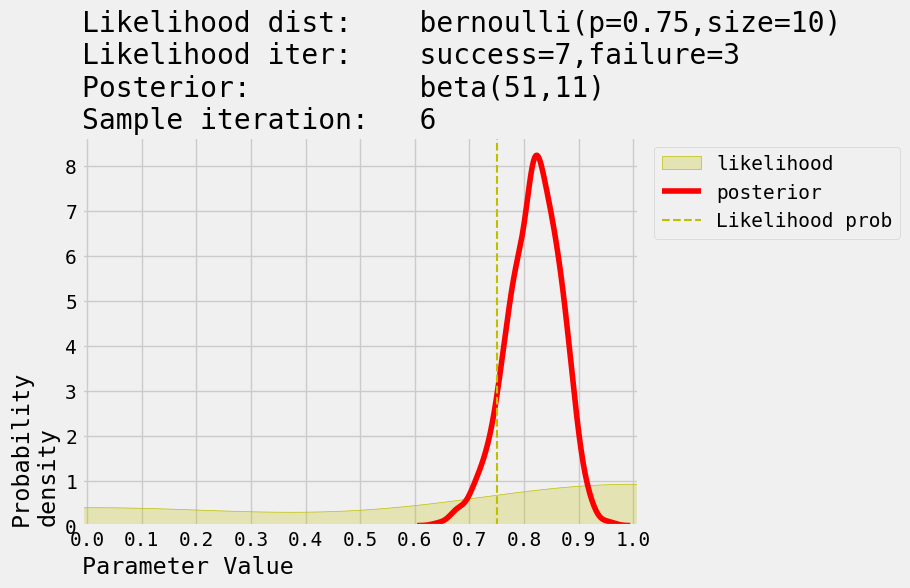

In [6]:
# create a Beta-Bernoulli conjugate distributions object
# the same one from previous cel
bbc = BetaBernoulliConjugate(
    prior_alpha=1,
    prior_beta=1,
    likelihood_prob=0.75,
    likelihood_trials=10,
    sampling_size=1_000  
)

# define plot layout
fig, ax = plt.subplots()
bbc.plot_dists(ax=ax, fig=fig, plot_posterior=False)

# iterate 5 times
for _ in range(5):
    # update posterior from prior and likelihood
    bbc.update_distributions()

# define plot layout
fig, ax = plt.subplots()
bbc.plot_dists(ax=ax, fig=fig, plot_prior=False)

### AB test

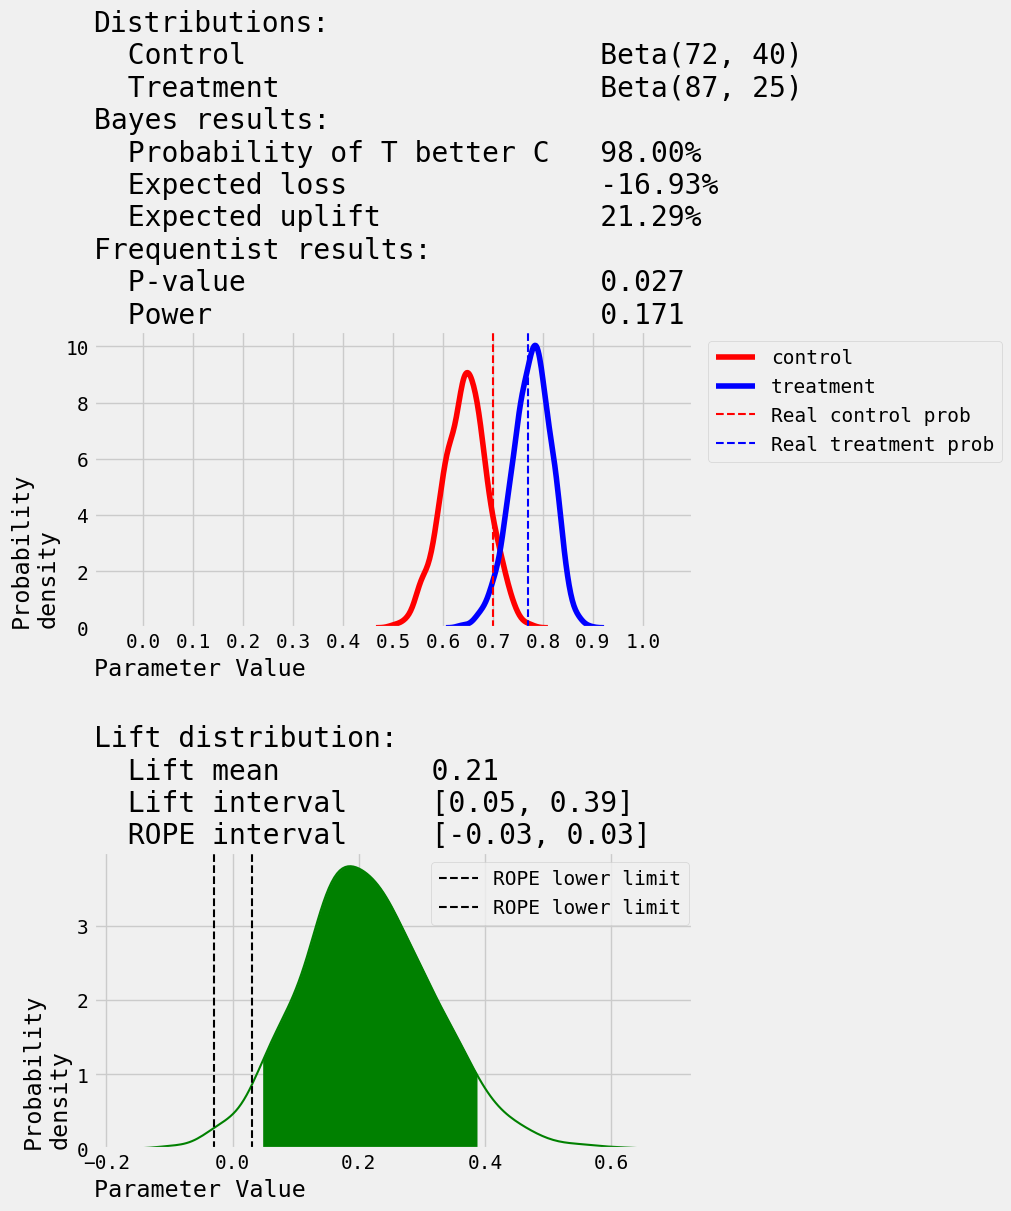

In [9]:
# create a Beta-Bernoulli conjugate for control group
control_bbc = BetaBernoulliConjugate(
    prior_alpha=1,
    prior_beta=1,
    likelihood_prob=0.70,
    likelihood_trials=10,
    sampling_size=1_000  
)
# create a Beta-Bernoulli conjugate for treatment group
treatment_bbc = BetaBernoulliConjugate(
    prior_alpha=1,
    prior_beta=1,
    likelihood_prob=0.77,
    likelihood_trials=10,
    sampling_size=1_000 
)

# iterate over 10 times
for _ in range(10):
    # each time update posterior distributions for both conjugates
    control_bbc.update_distributions()
    treatment_bbc.update_distributions()

# instanciate a AB testing object
ab_test = ABTest(
    control_data=control_bbc, 
    treatment_data=treatment_bbc
)
# calculate AB testing statistics
ab_test.calculate_ab_stats()
# plot
fig, axs = plt.subplots(
    ncols=1, nrows=2, constrained_layout=True,
    figsize=(10, 12))
ab_test.plot_ab_dists(
    axs=axs, fig=fig, 
    stats_title=True
)